# **Tutorial 6:  Remote sensing crops dataset**

**Week 2, Day 5: Climate Response: adaptation and impact**

**By Climatematch Academy**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ Ohad Zivan, Name Surname

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

___
# **Tutorial Objectives**

*Estimated timing of tutorial: 10 minutes*

Welcome to tutorial 6 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial, we will become familiar with the Crop dataset. By the end of this tutorial, 
- You will learn about remote sensing data collected from the Sentinel-2 satellite to find crops in the Togolese Republic
- You will learn to visualize and explore the dataset by Histogram, Heatmap and Scatter plot.
- You will learn to visualize the correlation between different features of the dataset


---



In [ ]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)



---


# Setup






In [2]:
#@title Importing necessary libraries
import numpy as np              # NumPy for numerical computing
import pandas as pd             # Pandas for data manipulation
import matplotlib.pyplot as plt # Matplotlib for visualization
from google.colab import drive  # Google Drive API for accessing Google Drive files


<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>
NOTE: Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a `"ModuleNotFoundError: No module named 'google.colab'" `error while using 'Colab', please run `"pip install google"` to install the required module.

---

# **Section 1: Remote Sensing Crops Dataset Exploration**

In this section we will load, visualise and explore the remote sensing data collected from the Sentinel-2 satellite to find crops in the Togolese Republic

In [ ]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

---
## **Section 1.1:  Loading  the dataset**
---








As discussed in the video, we will use remote sensing data collected from the Sentinel-2 satellite to find crops in the Togolese Republic. The data is described in [this paper](https://arxiv.org/pdf/2006.16866.pdf), and was accessed through [this repo](https://github.com/nasaharvest/cropharvest)). 

The data contains 1290 data points in the training set and 306 in the test set. Each data point represents one spatial location. As discussed in the video, the data contains normalized values from all Sentintel-2 bands, except B1 and B10, plus the pre-calculated NDVI. Therefore, each data point has 12 features in total. Each point is labeled as containing crops (1) or not (0).   
If you want to know more about what these bands(feature) mean, you can refer to [this resource](https://en.wikipedia.org/wiki/Sentinel-2#cite_note-15:~:text=Spectral%20bands%20for%20the%20Sentinel%2D2%20sensors).

In [3]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Load the dataset
data = np.load('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D5 - Climate Response - Adaptation Impact /W2D5 Tutorials/togo_crops_data.npz')
X_train = data['arr_0']  # Features of the training set
y_train = data['arr_1']  # Labels of the training set
X_test = data['arr_2']   # Features of the test set
y_test = data['arr_3']   # Labels of the test set

Mounted at /content/drive


In the next few sections we will be learning about various ways to visualise the data to find some trends.



---
## **Section 1.2 Visualising the Dataset**


---



### Visualisation 1.2 : Plot Histogram

Plot histograms of the training values of each feature. Specifically, for each feature, make a single plot that contains two histograms: one of the values for locations with crops and one for those without. Set the bins the same for each and reduce the transparency of each so that both are visible and comparable. Also print the percentage of data points that have crops in them. It is important to understand how balanced a data set is when analyzing performance.  
 


In [ ]:
#################################################
## TODO for students: 
# Fill in the code in empty places to remove this error
raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################

# Separate the positive and negative classes
pos_inds = ...  # Indices of positive class
neg_inds = ...  # Indices of negative class

# Create subplots for each feature
for i in range(12):
    plt.subplot(3, 4, i+1)  # Create a subplot
    # Plot histograms of the positive and negative classes for the current feature
    n, bins, patches = plt.hist(X_train[:, i][....], alpha=.5)  # Histogram of the positive class
    plt.hist(X_train[:, i][....], bins=bins, alpha=.5)         # Histogram of the negative class
    plt.title(f"Feature {i+1}")  # Set the title of the subplot to the current feature number

plt.tight_layout()  # Adjust spacing between subplots
plt.show()          # Display the subplots

print('Percentage of positive samples: ' + str(....)) )  #hint calculate % by (number of positive/(number of positive + number of negative)); can use len to calculate no 

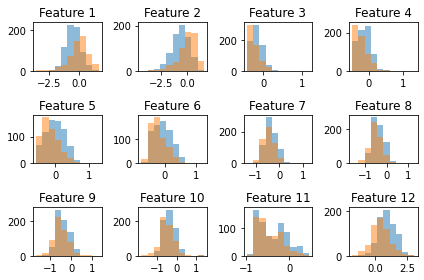

Percentage of positive samples: 0.5


In [ ]:
# to_remove solution


# Separate the positive and negative classes
pos_inds = np.where(y_train == 1)  # Indices of positive class
neg_inds = np.where(y_train == 0)  # Indices of negative class

# Create subplots for each feature
for i in range(12):
    plt.subplot(3, 4, i+1)  # Create a subplot
    # Plot histograms of the positive and negative classes for the current feature
    n, bins, patches = plt.hist(X_train[:, i][pos_inds], alpha=.5)  # Histogram of the positive class
    plt.hist(X_train[:, i][neg_inds], bins=bins, alpha=.5)         # Histogram of the negative class
    plt.title(f"Feature {i+1}")  # Set the title of the subplot to the current feature number

plt.tight_layout()  # Adjust spacing between subplots
plt.show()          # Display the subplots

print('Percentage of positive samples: ' + str(len(pos_inds)/(len(pos_inds)+len(neg_inds))) )

### Think! 1.1: Looking at features by class label 

Based on these plots, do you think the final feature would be useful for identifying crops? What about second to last?

---
## (Bonus) **Section 1.3: Visualization of correlation between the features**
---



Looking at how different features of the data relate to each other can help us better understand the data and can be important when thinking about modeling building.

### Visualisation 1.3 : Plot Heatmap
First we produce a heatmap showing the correlation coefficients between the features, with blue indicating negative correlation and red indicating positive correlation. 

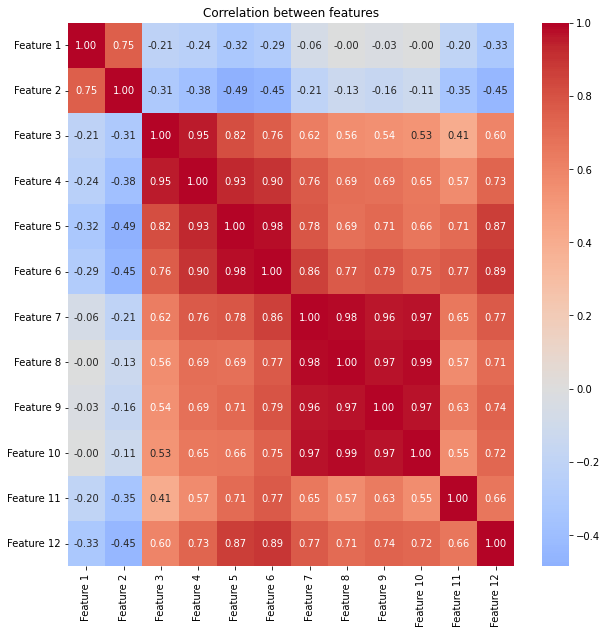

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
corr = np.corrcoef(X_train, rowvar=False)

# Plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            xticklabels=[f"Feature {i+1}" for i in range(12)],
            yticklabels=[f"Feature {i+1}" for i in range(12)])
ax.set_title("Correlation between features")
plt.show()


The correlation coefficient summarizes the relationship between two features. We can see this relationship more directly by plotting scatter plots of all the training data points. 

### Visualisation 1.3 : Plot Scatter plots
In this example, we create a 12x12 grid of subplots, with each subplot showing a scatter plot of two features. The color of the dots in the scatter plot represents the label of the data point (y_train). We set the cmap parameter of plt.scatter to 'bwr' to use a colormap that goes from blue for negative labels to red for positive labels.

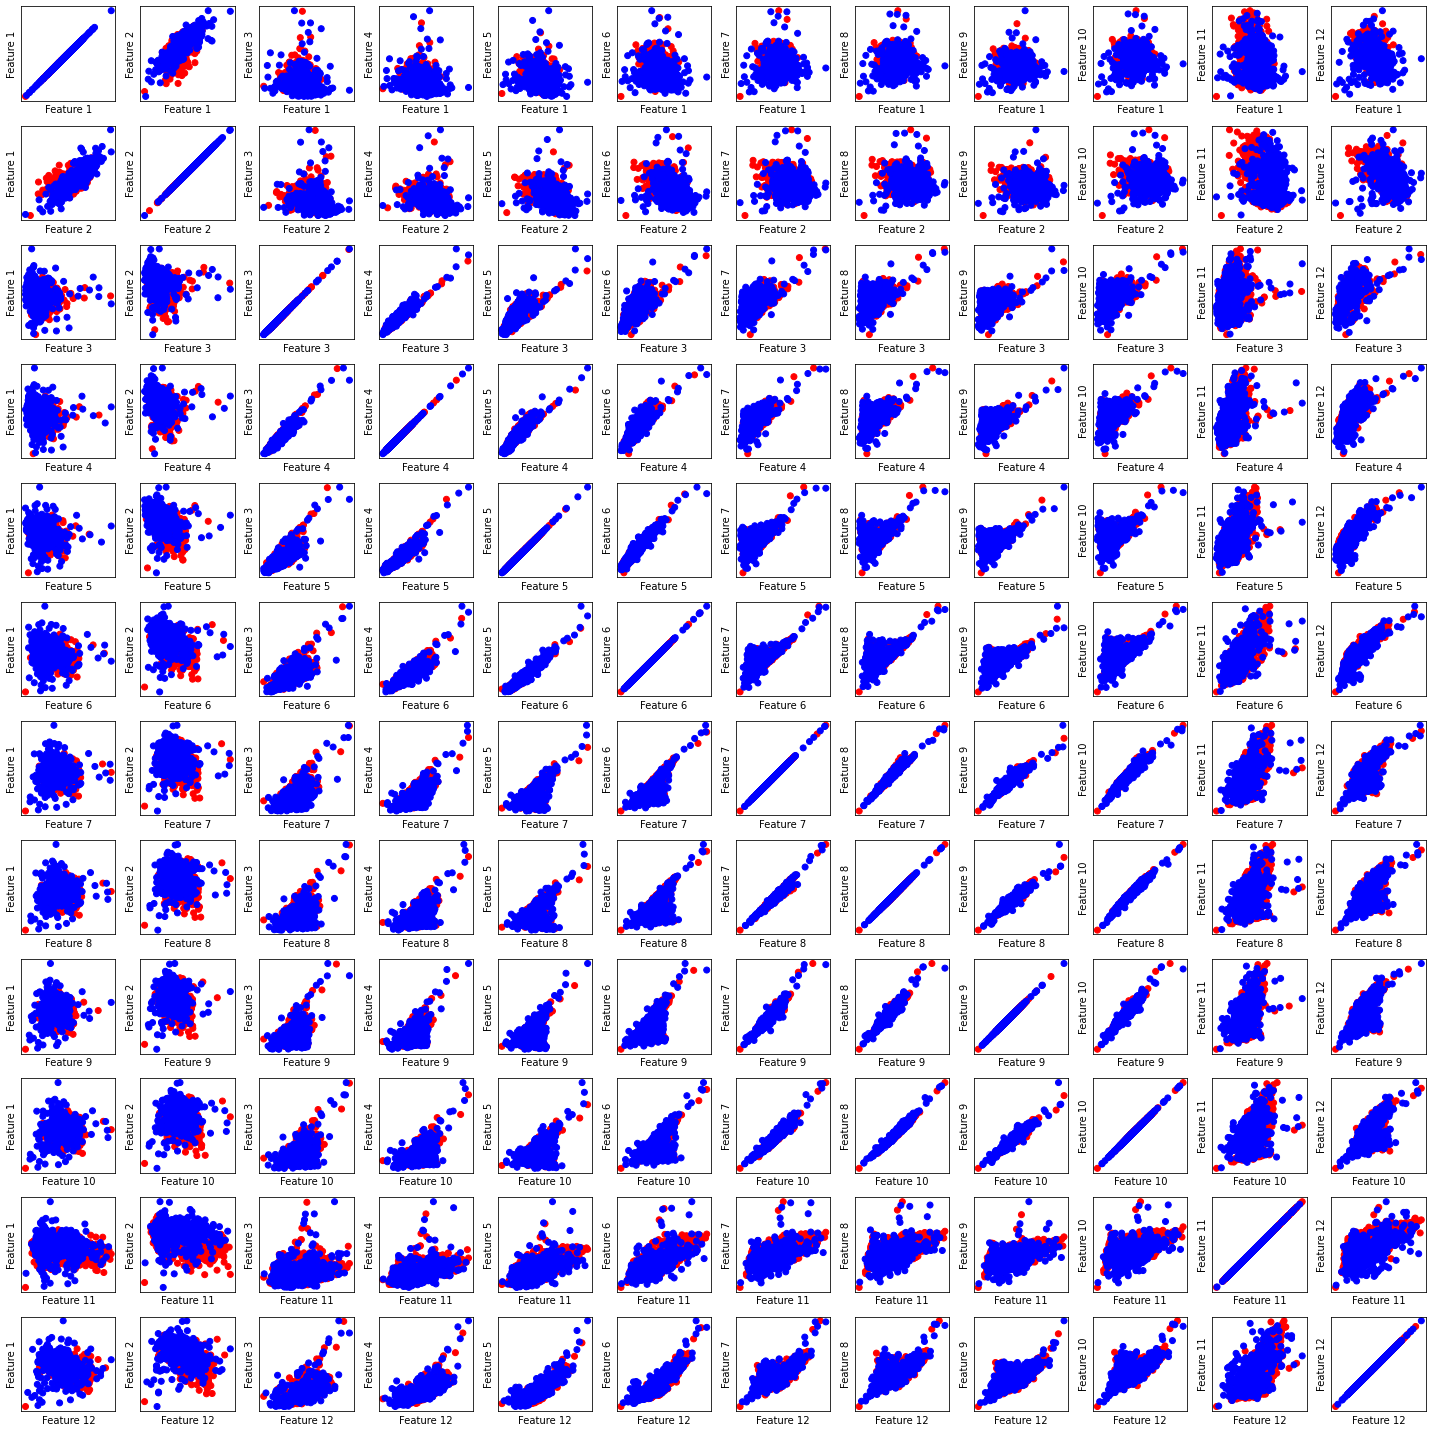

In [ ]:
# Plot the data using scatter plots
fig, axs = plt.subplots(12, 12, figsize=(20, 20))
for i in range(12):
    for j in range(12):
        axs[i, j].scatter(X_train[:, i], X_train[:, j], c=y_train, cmap='bwr')
        axs[i, j].set_xlabel(f"Feature {i+1}")
        axs[i, j].set_ylabel(f"Feature {j+1}")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()

### Think!: Reflecting on correlations

Based on what you know about remote sensing and hyperspectral data, does it make sense that some pairs of features may be more correlated than others?



---


# **Summary**

Estimated timing of tutorial: 

In this tutorial, we familiarized ourselves with the crop dataset and visualized it to analyze the impact of various features.

---

